# Tuning 100G Network 

# Step 0. Parameter Setting 

In [1]:
import dtnmonitor_v2 as dtn
import subprocess,datetime,sys

def parse_mlnx_log(key_word_t):
    fr = open("/tmp/mlnx_tune_jupyper.log",'r')
    lock=True
    lo=True
    count=0
    while lock:
    #for line in fr:
        line = fr.readline()
        if 'mlnx-en' in line:
            print(line.strip())
            while lo:
                txt=fr.readline()
                for ky in key_word_t:
                    if ky in txt:
                        print((txt).strip())
                        #print("count=%s, txt=%s",(count, txt))

                count+=1
                if count > 40:
                    lock=False
                    lo=False
    fr.close()


def exec_print(command):
  with open(logfile, 'a') as f:
      process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
      f.write("\n# command: " + command + "(time:" + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + ")\n")
      for line in iter(process.stdout.readline, b''):
          # system print
          sys.stdout.write(line)
          # log
          f.write(line.decode(sys.stdout.encoding) )


            
key_word_t=("numa:","pci_slot:","mtu:","rx_queue_size:","tx_queue_size:","name:")            

logfile='/tmp/test2.log' # log file

graph_mode=1  #0 all, 1 100pt



# Step 1. run  mlnx_tune for getting more information

In [2]:
### 1.1 run mlnx_tune
#$ sudo mlnx_tune
# set it and checking information
exec_print("sudo /usr/sbin/mlnx_tune -i /tmp/mlnx_tune_jupyper.log")

sudo: /usr/sbin/mlnx_tune: command not found


In [3]:
### 1.2 get system information
# be note that following procedure will use these information
parse_mlnx_log(key_word_t)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/mlnx_tune_jupyper.log'

# Step 2. 100G DTN System Checking Instruction Guild

## 2.1. To change TCP parameters, edit /etc/sysctl.conf as:

In [ ]:
### change TCP parameters, 
# vim /etc/sysctl.conf as below : 
# =======================
# net.core.default_qdisc = fq
# net.core.netdev_max_backlog=250000
# net.ipv4.tcp_no_metrics_save=1
# net.ipv4.tcp_congestion_control=htcp
# net.ipv4.tcp_mtu_probing=1
# net.core.rmem_max=671088640
# net.core.wmem_max=671088640
# net.core.rmem_default=335544320
# net.core.wmem_default=335544320
# net.core.optmem_max=335544320
# net.ipv4.tcp_mem=33554432 335544320 2355443200
# net.ipv4.tcp_rmem = 409600 100873800 2147483647
# net.ipv4.tcp_wmem = 409600 100873800 2147483647
# =======================

In [ ]:
### check :
# show your system config
exec_print("sysctl -a |grep 'net.core\|net.ipv4.tcp'")

## 2.2 update Mellanox driver to the most recent one (4.1) and tuning script package.


In [ ]:
### Run the tuning script in priority: 
# 2.2 how to set
# sudo mlnx_tune
# you have run it in step 1
# 

## 2.3 Bind NIC interrupt with the correct numa cores using:


In [ ]:
### bind NIC interrupt with the correct numa cores
# 2.3 how to set : <numa> & <name> can refer step1.2 
#$  /user/sbin/set_irq_affinity_bynode.sh <numa> <name>
# ie : /user/sbin/set_irq_affinity_bynode.sh 1 ens4

In [ ]:
### check :
# no check command

## 2.4 Check PCIe Width, Speed, Max Payload Size and Max Read Request

In [ ]:
### detail ref = lspci: https://community.mellanox.com/docs/DOC-2496
# set the PCIe speed, such as 
#$ sudo /usr/bin/setpci -s <pci_slot> 68.W=5xxx
# but some information we should get

In [ ]:
### check :
# you should change xx as the refered step1.2 information <pci_slot>
# ie : $ sudo /usr/bin/setpci -s 83:00.0 68.W
exec_print("sudo setpci -s 83:00.0 68.w")

In [ ]:
# it should be the 5xxx | ie : 5820
# 2.4 how to set : (if xxx=820) than
#$ sudo /usr/bin/setpci -s 83:00.0 68.w=5820

## 2.5. Increase txqueuelen to 10000:


In [ ]:
### Increase 100G ethernet txqueuelen to 10000
# 2.5 how to set : 
#$ ifconfig <name> txqueuelen 10000

In [ ]:
### check :
exec_print('ifconfig ens4 |grep txqueuelen')

## 2.6 Set CPU gonvener setting to performance:

In [ ]:
### tune the CPU performance
# 2.6 how to set : 
#$ sudo cpupower frequency-set -g performance

In [ ]:
exec_print('cpupower frequency-info -g')

## 2.7. Turn off irqbalance and tuned:

In [ ]:
### turn off irqbalance 
# 2.7 how to set : 
#$ service  irqbalance stop
### turn off tuned
# 2.7 how to set : 
### service  tuned stop

In [ ]:
exec_print('service irqbalance status ')

In [ ]:
exec_print('service tuned status ')

# Step 3. Start monitor

Interrupted


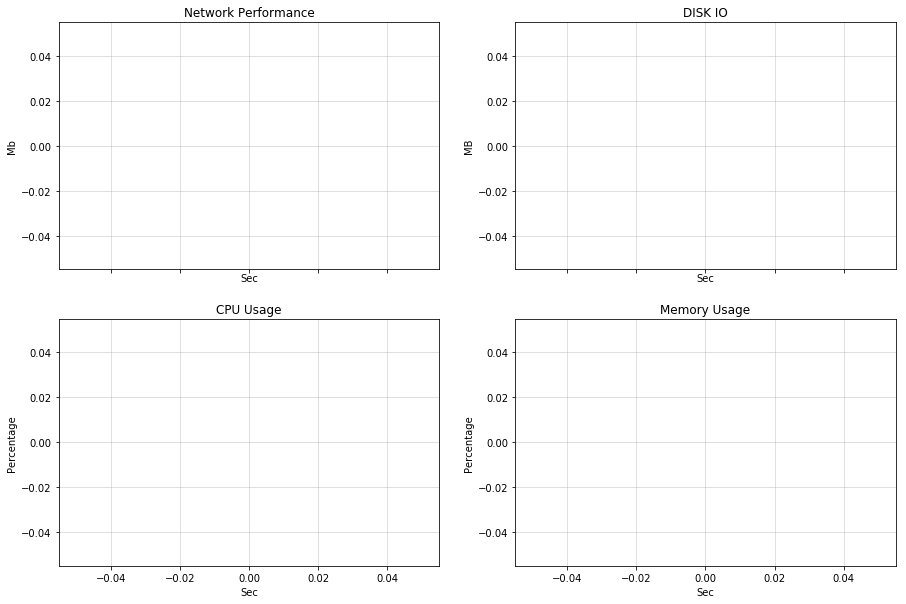

None

In [ ]:
## download and monitor
### select network interface ,  [all | <net_interface> ]  ###
## if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
#dtn.interface = 'eth0.2038' 
#dtn.interface = 'all'
dtn.interface = 'ens4.2038' 
#dtn.interface = 'eth1'
dtn.exec_command("python callmonitor_v2.py",graph_mode)

## you can stop monitoring anytime when you press "interrupt kernel"